In [97]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [98]:
df = pd.read_csv("data.csv" ,encoding= 'unicode_escape')

In [6]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [7]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [8]:
df.shape

(541909, 8)

In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None


In [10]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [12]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [16]:
print(df['Country'].unique())

['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'EIRE' 'Switzerland' 'Spain' 'Poland' 'Portugal' 'Italy' 'Belgium'
 'Lithuania' 'Japan' 'Iceland' 'Channel Islands' 'Denmark' 'Cyprus'
 'Sweden' 'Austria' 'Israel' 'Finland' 'Bahrain' 'Greece' 'Hong Kong'
 'Singapore' 'Lebanon' 'United Arab Emirates' 'Saudi Arabia'
 'Czech Republic' 'Canada' 'Unspecified' 'Brazil' 'USA'
 'European Community' 'Malta' 'RSA']


In [3]:
df_clean = df[df['Quantity'] >= 0]
df_clean.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
df_clean['TotalPrice'] = df_clean['Quantity'] * df_clean['UnitPrice']

/var/folders/mr/kssk23v57tb4236qqsb_hp1m0000gp/T/ipykernel_11781/343946211.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['TotalPrice'] = df_clean['Quantity'] * df_clean['UnitPrice']


In [5]:
df_clean.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


In [7]:
country_group = df_clean.groupby('Country')
mean_price_by_country = country_group['TotalPrice'].mean()
print(mean_price_by_country)

Country
Australia               116.895620
Austria                  25.624824
Bahrain                  41.896667
Belgium                  20.283772
Brazil                   35.737500
Canada                   24.280662
Channel Islands          27.340160
Cyprus                   22.134169
Czech Republic           33.069600
Denmark                  49.882474
EIRE                     35.907520
European Community       21.670833
Finland                  32.913985
France                   24.942330
Germany                  25.311562
Greece                   32.831172
Hong Kong                55.252817
Iceland                  23.681319
Israel                   27.577153
Italy                    23.064960
Japan                   116.561900
Lebanon                  37.641778
Lithuania                47.458857
Malta                    24.335625
Netherlands             120.798282
Norway                   33.736418
Poland                   22.226212
Portugal                 22.483078
RSA         

In [6]:
country_group = df_clean.groupby('Country')

In [7]:
country_group.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
395472,571035,21238,RED RETROSPOT CUP,8,10/13/2011 12:50,0.85,12446.0,RSA,6.80
395473,571035,21243,PINK POLKADOT PLATE,8,10/13/2011 12:50,1.69,12446.0,RSA,13.52
395474,571035,23240,SET OF 4 KNICK KNACK TINS DOILY,6,10/13/2011 12:50,4.15,12446.0,RSA,24.90
395475,571035,23209,LUNCH BAG VINTAGE DOILY,10,10/13/2011 12:50,1.65,12446.0,RSA,16.50


In [10]:
mean_price_by_country = country_group['TotalPrice'].mean()

In [11]:
mean_price_by_country.head()

Country
Australia    116.895620
Austria       25.624824
Bahrain       41.896667
Belgium       20.283772
Brazil        35.737500
Name: TotalPrice, dtype: float64

In [8]:
df_clean['InvoiceDate'] = pd.to_datetime(df_clean['InvoiceDate'])

/var/folders/mr/kssk23v57tb4236qqsb_hp1m0000gp/T/ipykernel_11781/1990367648.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['InvoiceDate'] = pd.to_datetime(df_clean['InvoiceDate'])


In [13]:
df_clean.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [9]:
df_clean['Year'] = df_clean['InvoiceDate'].dt.year

/var/folders/mr/kssk23v57tb4236qqsb_hp1m0000gp/T/ipykernel_11781/3492169785.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Year'] = df_clean['InvoiceDate'].dt.year


In [15]:
df_clean.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010


In [16]:
year_group = df_clean.groupby('Year')
mean_year_group = year_group['TotalPrice'].sum()

In [17]:
mean_year_group

Year
2010     823746.140
2011    9820814.284
Name: TotalPrice, dtype: float64

In [10]:
df_clean['Year'].unique()

array([2010, 2011])

In [11]:
num_customers_by_year_and_country = df_clean.groupby(['Year', 'Country'])['CustomerID'].nunique()

In [12]:
dfcustom = num_customers_by_year_and_country.to_frame()

In [13]:
dfcustom.dtypes

CustomerID    int64
dtype: object

In [14]:
print(dfcustom.loc[1:5])

Empty DataFrame
Columns: [CustomerID]
Index: []


In [15]:
retention_rate_by_year_and_country = num_customers_by_year_and_country.pct_change().fillna(0)

In [20]:
df2010group=df2010.groupby(['Country'])['CustomerID'].nunique()

In [19]:
df2010list=df2010group.axes
print(df2010list[0][0])

Australia


In [50]:
df2010=df_clean[df_clean['Year'] == 2010]
final2010=[]
df2010group=df2010.groupby(['Country'])['CustomerID'].nunique()
list_2010 = df2010group.tolist() #List of values 

df2010list=df2010group.axes #List of countries

for i in range(len(list_2010)):
    final2010.append([df2010list[0][i],list_2010[i]])
print(final2010) 

df2010list=df2010list[0].tolist()

[['Australia', 2], ['Austria', 1], ['Bahrain', 0], ['Belgium', 4], ['Channel Islands', 1], ['Cyprus', 1], ['Denmark', 1], ['EIRE', 3], ['Finland', 1], ['France', 15], ['Germany', 18], ['Iceland', 1], ['Italy', 2], ['Japan', 3], ['Lithuania', 1], ['Netherlands', 2], ['Norway', 1], ['Poland', 1], ['Portugal', 6], ['Spain', 4], ['Sweden', 1], ['Switzerland', 2], ['United Kingdom', 815]]


In [23]:
df2011list.append('Lithuania')
list_2011.append(0)
print(df2011list)
print(list_2011)

['Australia', 'Austria', 'Bahrain', 'Belgium', 'Brazil', 'Canada', 'Channel Islands', 'Cyprus', 'Czech Republic', 'Denmark', 'EIRE', 'European Community', 'Finland', 'France', 'Germany', 'Greece', 'Hong Kong', 'Iceland', 'Israel', 'Italy', 'Japan', 'Lebanon', 'Malta', 'Netherlands', 'Norway', 'Poland', 'Portugal', 'RSA', 'Saudi Arabia', 'Singapore', 'Spain', 'Sweden', 'Switzerland', 'USA', 'United Arab Emirates', 'United Kingdom', 'Unspecified', 'Lithuania']
[9, 10, 2, 25, 1, 4, 8, 8, 1, 9, 3, 1, 12, 84, 93, 4, 0, 1, 3, 12, 8, 1, 2, 8, 10, 6, 17, 1, 1, 1, 29, 8, 21, 4, 2, 3814, 4, 0]


In [22]:
df2011=df_clean[df_clean['Year'] == 2011]
final2011=[]
df2011group=df2011.groupby(['Country'])['CustomerID'].nunique()
list_2011 = df2011group.tolist()

df2011list=df2011group.axes

for i in range(len(list_2011)):
    final2011.append([df2011list[0][i],list_2011[i]])
df2011list=df2011list[0].tolist()

In [53]:
df2011list.index(df2010list[0][1])

1

In [29]:
df2011list.index(df2010list[0][4])

6

In [46]:
growth=[]
final_country =[]
final_count=[]
for i in range(0,len(df2010list[0])):
    temp=df2011list.index(df2010list[0][i])

    num1= list_2010[i]
    num2= list_2011[temp]
    if (num1!=0):
        growth.append([df2010list[0][i],(num2-num1)/num1])
        final_country.append(df2010list[i])
        final_count.append((num2-num1)/num1)
    else:
        growth.append([df2010list[0][i],99999])
        final_country.append(df2010list[0][i])
        final_count.append(99999)
print(growth)

IndexError: list index out of range

In [68]:
country_list=[]
change_list=[]
for i in range(0,len(df2010list)):
    temp=df2011list.index(df2010list[i])
    country = df2011list[temp]

    val2010 = list_2010[i]
    val2011 = list_2011[temp]
    
    if(val2010==0):
        country_list.append(df2010list[i])
        change_list.append(0)
    else:
        change = (val2011-val2010)/val2010
        country_list.append(df2010list[i])
        change_list.append(change)
        

'Denmark'

In [55]:
len(df2010list)

23

The growth list is the final list of growth by country in 2011.

In [80]:
from colorspacious import cspace_converter

Text(0, 0.5, 'Retention %')

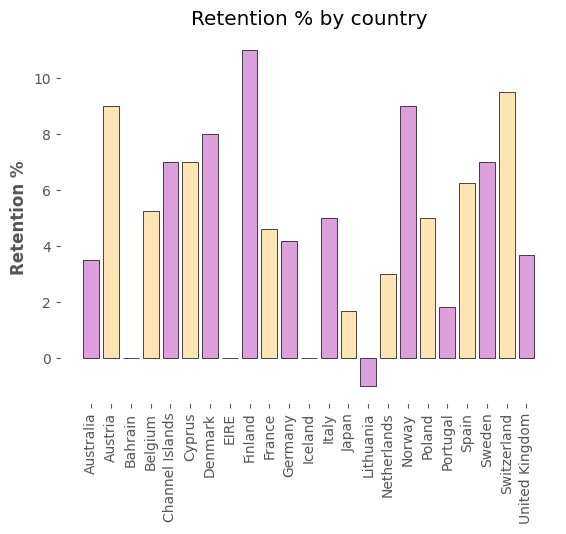

In [95]:
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.set_facecolor('white')

plt.xticks(ticks=range(len(country_list)), labels=country_list, rotation=90)
plt.bar(country_list,change_list, color=['plum', 'moccasin'],edgecolor = "black")
plt.title("Retention % by country")
plt.ylabel("Retention %", fontweight='bold')

In [81]:
print( plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [96]:
df2010list

['Australia',
 'Austria',
 'Bahrain',
 'Belgium',
 'Channel Islands',
 'Cyprus',
 'Denmark',
 'EIRE',
 'Finland',
 'France',
 'Germany',
 'Iceland',
 'Italy',
 'Japan',
 'Lithuania',
 'Netherlands',
 'Norway',
 'Poland',
 'Portugal',
 'Spain',
 'Sweden',
 'Switzerland',
 'United Kingdom']

In [181]:
df_topitems = df[df['Quantity'] >= 0]
df_topitems['TotalPrice'] = df['Quantity'] * df['UnitPrice']
df_topitems['InvoiceDate'] = pd.to_datetime(df_topitems['InvoiceDate'])
df_topitems['Year'] = df_topitems['InvoiceDate'].dt.year


df_sum_2010 = df_topitems[df_topitems['Year']==2010]
df_sum_2010 =df_sum_2010.groupby(['Country']).sum()

df_sum_2011 = df_topitems[df_topitems['Year']==2011]
df_sum_2011 =df_sum_2011.groupby(['Country']).sum()

/var/folders/mr/kssk23v57tb4236qqsb_hp1m0000gp/T/ipykernel_11781/3652930463.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_topitems['TotalPrice'] = df['Quantity'] * df['UnitPrice']
/var/folders/mr/kssk23v57tb4236qqsb_hp1m0000gp/T/ipykernel_11781/3652930463.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_topitems['InvoiceDate'] = pd.to_datetime(df_topitems['InvoiceDate'])
/var/folders/mr/kssk23v57tb4236qqsb_hp1m0000gp/T/ipykernel_11781/3652930463.py:4: SettingWithCopyWarning: 
A value is tryin

In [182]:
bar_list2011=df_sum_2011.axes[0].tolist()
bar_list2010=df_sum_2010.axes[0].tolist()

bar_sales2011 = df_sum_2011['TotalPrice'].tolist()
bar_sales2010 = df_sum_2010['TotalPrice'].tolist()

In [183]:
bar_list2010.pop(14)
bar_sales2010.pop(14)

1661.06

In [184]:
final_sales2010=[]
count=0
for i in range(len(bar_list2011)):
    country2011 = bar_list2011[i]
    if(country2011 in bar_list2010):
        final_sales2010.append(bar_sales2010[count])
        print(bar_sales2010[count])
        count=count+1
    else:
        final_sales2010.append(0)

    

1032.85
277.2
205.74
1809.91
363.53
1590.82
1281.5
10033.26
892.8
9616.31
15241.14
711.79
811.5
7705.07
8784.48
3787.12
248.16
2439.9700000000003
1843.73
3834.2999999999997
1304.92
748268.98


In [185]:
test2010=bar_list2010
test2010.pop()
test2010.pop()
val2010=final_sales2010
val2010.pop()
val2010.pop()

748268.98

In [186]:
test2011=bar_list2011
test2011.pop()
test2011.pop()
val2011=bar_sales2011
val2011.pop()
val2011.pop()

8254828.984

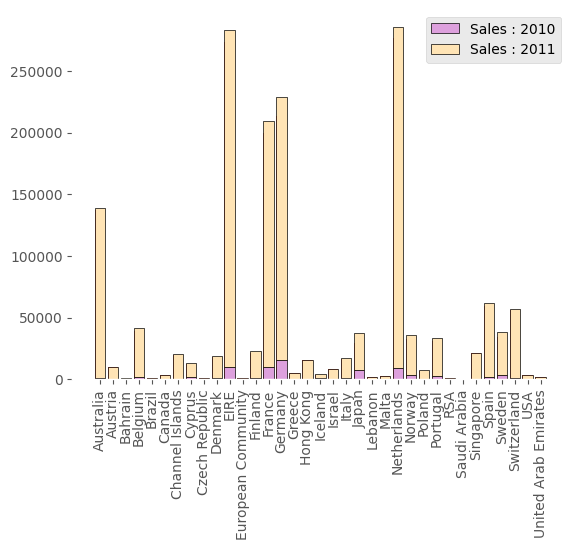

In [193]:
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.set_facecolor('white')

plt.xticks(ticks=range(len(test2011)), labels=test2011, rotation=90)
plt.bar(test2011,val2011)

x1=plt.bar(test2011, val2010, color='plum',edgecolor = "black")
x2=plt.bar(test2011, val2011, bottom=val2010, color='moccasin',edgecolor = "black")

plt.legend([x1, x2], ['Sales : 2010', 'Sales : 2011'])